In [2]:
import ROOT
ROOT.gSystem.Load('ModGaus_cxx.so')
ROOT.gSystem.Load('ModGaus01_cxx.so')
ROOT.gSystem.Load('ModGaus10_cxx.so')
ROOT.gSystem.Load('ModGaus11_cxx.so')
ROOT.gSystem.Load('ModGaus21_cxx.so')
ROOT.TGaxis.SetMaxDigits(3)

Welcome to JupyROOT 6.12/07


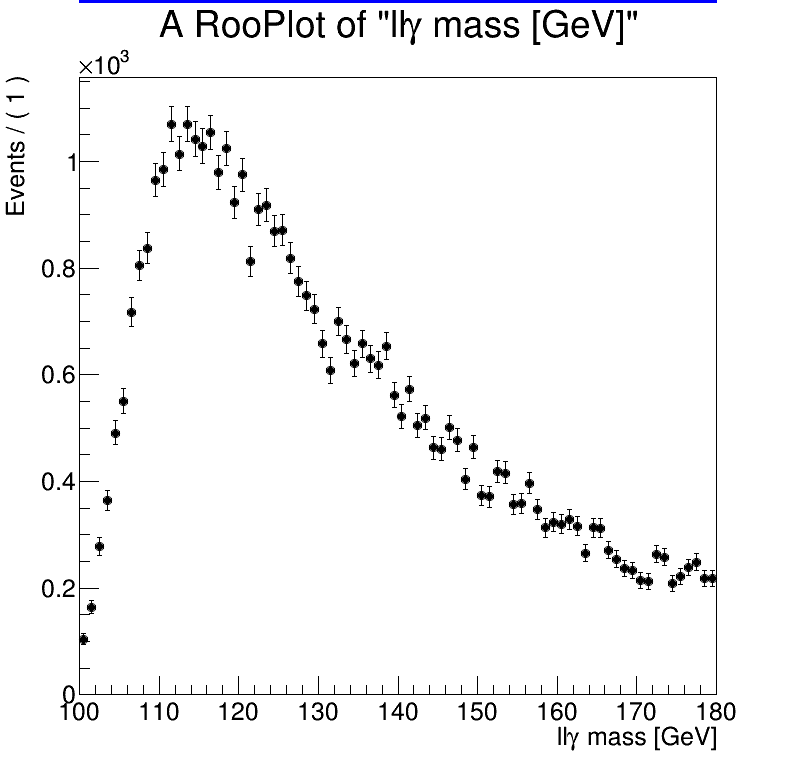

In [35]:
category = "inclusive"
nbin = 80
xlow = 100
xhigh = 180
useSumW2 = True

outpath = "plots/"
    
ROOT.gSystem.mkdir(outpath, True)
ROOT.gSystem.RedirectOutput(outpath+"/log.txt", "w")

sigma = 5.;           sigma_l = 3.;      sigma_h = 10.;
turnon = 108.64;      turnon_l = 105.;   turnon_h = 109.;
par1 = -0.07;        par1_l = -0.5;    par1_h = 0.;
coeff1 = 0.05; coeff1_l = 0.;    coeff1_h = 1.;
par3 = -0.04;      par3_l = -0.5;    par3_h = 0.;
coeff3 = 0.0002; coeff3_l = 0.;    coeff3_h = 1.;
par5 = -0.02;      par5_l = -0.5;     par5_h = 0.;
coeff5 =0.002;  coeff5_l = 0.; coeff5_h = 1.;

m = ROOT.RooRealVar("llphoton_m", "ll#gamma mass [GeV]", xlow, xhigh)
sigma = ROOT.RooRealVar("Exponential_sigma", "Exponential_sigma", sigma, sigma_l, sigma_h)
turnon = ROOT.RooRealVar("Exponential_turnon", "Exponential_turnon", turnon, turnon_l, turnon_h)

par1 = ROOT.RooRealVar("Exponential_par1", "Exponential_par1", par1, par1_l, par1_h)
coeff1 = ROOT.RooRealVar("Exponential_coeff1", "Exponential_coeff1", coeff1, coeff1_l, coeff1_h)
par3 = ROOT.RooRealVar("Exponential_par3", "Exponential_par3", par3, par3_l, par3_h)
coeff3 = ROOT.RooRealVar("Exponential_coeff3", "Exponential_coeff3", coeff3, coeff3_l, coeff3_h)
par5 = ROOT.RooRealVar("Exponential_par5", "Exponential_par5", par5, par5_l, par5_h)
coeff5 = ROOT.RooRealVar("Exponential_coeff5", "Exponential_coeff5", coeff5, coeff5_l, coeff5_h)
    
step = ROOT.RooGenericPdf("Exponential_step", "Exponential_step",
                          "1e-20+(m > turnon)*(coeff1*exp(m*par1) + coeff3*exp(m*par3) + coeff5*exp(m*par5))",
                          ROOT.RooArgList(m, turnon, coeff1, par1, coeff3, par3, coeff5, par5))
gau = ROOT.RooGaussModel("Exponential_gau", "Exponential_gau", m, mean, sigma)
background = ROOT.RooFFTConvPdf("Exponential_gauxlau3", "Exponential_gauxlau3", m, step, gau)

inpath = "DataHisto.root"
infile = ROOT.TFile(inpath)

hdata = infile.Get("h_llg")

data = ROOT.RooDataHist(category, category, ROOT.RooArgList(m), ROOT.RooFit.Import(hdata))

fitResult = background.fitTo(data, ROOT.RooFit.Minimizer("Minuit2", "Migrad"), ROOT.RooFit.Save(1), ROOT.RooFit.Range(xlow, xhigh), ROOT.RooFit.SumW2Error(ROOT.kTRUE))

can = ROOT.TCanvas("can", "canvas", 800, 800)

plot = m.frame(ROOT.RooFit.Range(xlow, xhigh))
data.plotOn(plot, ROOT.RooFit.Binning(nbin))
background.plotOn(plot, ROOT.RooFit.LineColor(ROOT.kBlue), ROOT.RooFit.LineWidth(5))
plot.Draw()

can.Draw()



In [ ]:
# turnon = 108; turnon_l = 107.; turnon_h = 109.;
# sigma = 6.  ; sigma_l = 3.  ; sigma_h = 8.;
# coeff1 = 3.6576e-04; coeff1_l = 0.0; coeff1_h = 0.5;
# coeff2 = 3.6576e-04; coeff2_l = 0.0; coeff2_h = 0.5;
# coeff3 = 3.6576e-04; coeff3_l = 0.0; coeff3_h = 0.5;
# coeff4 = 3.6576e-04; coeff4_l = 0.0; coeff4_h = 0.5;

# mean = ROOT.RooRealVar("Laurent_mean", "Laurent_mean", 125.)
# sigma = ROOT.RooRealVar("Laurent_sigma", "Laurent_sigma", sigma, sigma_l, sigma_h)
# turnon = ROOT.RooRealVar("Laurent_turnon", "Laurent_turnon", turnon, turnon_l, turnon_h)
    
# cp1 = ROOT.RooRealVar("Laurent_cp1", "Laurent_cp1", coeff1, coeff1_l, coeff1_h)
# cp2 = ROOT.RooRealVar("Laurent_cp2", "Laurent_cp2", coeff2, coeff2_l, coeff2_h)
# cp3 = ROOT.RooRealVar("Laurent_cp3", "Laurent_cp3", coeff3, coeff3_l, coeff3_h)
# cp4 = ROOT.RooRealVar("Laurent_cp4", "Laurent_cp4", coeff4, coeff4_l, coeff4_h)


# step = ROOT.RooGenericPdf("Laurent_step", "Laurent_step",
#                           "1e-20+(m > turnon)*(cp1*pow(m,-4)+cp2*pow(m,-5)+cp3*pow(m,-3)+cp4*pow(m,-6))",
#                           ROOT.RooArgList(m, turnon, cp1, cp2, cp3, cp4))
